In [1]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import time
import json
import io
import numpy as np
import urllib
import sys
from selenium.webdriver.common.proxy import Proxy, ProxyType

In [2]:
# Make the request and check object type
url = 'https://seekingalpha.com/symbol/TSLA'
r = requests.get(url, proxies={'http':'103.243.132.58'})
type(r)

requests.models.Response

In [3]:


driver = webdriver.Firefox(executable_path="./geckodriver")  # Optional argument, if not specified will search path.
driver.get('https://seekingalpha.com/symbol/TSLA'); 

content = driver.page_source

SCROLL_PAUSE_TIME = 2

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)
    content = content + driver.page_source
    time.sleep(SCROLL_PAUSE_TIME)
    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    
driver.quit()

In [ ]:
pages = range(1,10)
driver = webdriver.Firefox(executable_path="./geckodriver")
driver.get('https://seekingalpha.com/search/?q=tesla&type=&path='); 
time.sleep(15)
content4[0] = driver.page_source
driver.get('https://seekingalpha.com/search/?q=tesla&type=&path=#page=3');
time.sleep(15)
content4[1] = driver.page_source
soup = BeautifulSoup(content4[2], "html5lib")
driver.quit()

In [ ]:
len(content4[0])

In [ ]:

searchContent = ""
pageURL = 'https://seekingalpha.com/search/?q=tesla&type=&path='
numURLSnip = '#page='
driver = webdriver.Firefox(executable_path="./geckodriver")
for i in range(1, 11):
    if i == 1:
        driver.get(pageURL); 
        time.sleep(15)
        searchContent = searchContent + driver.page_source
    else:
        driver.get(pageURL + numURLSnip + str(i));
        time.sleep(15)
        searchContent = searchContent + driver.page_source
        
driver.quit()

In [ ]:
searchSoup = BeautifulSoup(searchContent, "html5lib")
liTags = searchSoup.findAll("li", {"class": "item"})[:1000]
print(len(liTags))

In [ ]:
anchors = searchSoup.findAll("a", {"sasource":"cloudsearch_results"}, href=True)
print(anchors[97]['href'])

In [8]:
DJICompanies = ["Dow Chemical", "Travelers Insurance", "Walgreens Boots Alliance", "Caterpillar", "Goldman Sachs", "3M", "American Express", "Nike", "United Technologies", "IBM", "McDonald’s", "Pfizer", "Intel", "Cisco Systems", "Boeing", "Merck & Co.", "UnitedHealth", "Chevron", "Coca-Cola", "Verizon", "Home Depot", "Walt Disney", "Exxon Mobil", "Procter & Gamble", "Visa", "Walmart", "Johnson & Johnson", "JPMorgan Chase & Co.", "Apple", "Microsoft"]
len(DJICompanies)

30

In [3]:
saURL = 'https://seekingalpha.com/search/?q='
saURLEnd = '&type=&path='
driver = webdriver.Firefox(executable_path="./geckodriver")
driver.get(saURL + DJICompanies[10] + saURLEnd); 
time.sleep(15)
contentTest = driver.page_source
print(contentTest)

KeyboardInterrupt: 

In [9]:
def getSeekingAlphaSearchAnchors(companies, sleepTime):
    saURL = 'https://seekingalpha.com/search/?q='
    saURLEnd = '&type=&path='
    numURLSnip = '#page='
    driver = webdriver.Firefox(executable_path="./geckodriver")
    companyAnchors = [""] * 30
    for i in range(len(companies)):
        pageURL = saURL + companies[i] + saURLEnd
        searchContent = ""
        for j in range(1, 11):
            if j == 1:
                driver.get(pageURL); 
                time.sleep(sleepTime)
                searchContent = searchContent + driver.page_source
            else:
                driver.get(pageURL + numURLSnip + str(j));
                time.sleep(sleepTime)
                searchContent = searchContent + driver.page_source
        searchSoup = BeautifulSoup(searchContent, "html5lib")
        anchors = searchSoup.findAll("a", {"sasource":"cloudsearch_results"}, href=True)
        companyAnchors[i] = anchors
    driver.quit()
    return companyAnchors

In [10]:
allCompaniesAnchors = getSeekingAlphaSearchAnchors(DJICompanies, 3)

In [9]:
companies = DJICompanies
saURL = 'https://seekingalpha.com/search/?q='
saURLEnd = '&type=&path='
numURLSnip = '#page='
driver = webdriver.Firefox(executable_path="./geckodriver")
companyAnchors = [""] * 30
i = 6
pageURL = saURL + companies[i] + saURLEnd
print(pageURL)
searchContent = ""
for j in range(1, 11):
    if j == 1:
        driver.get(pageURL); 
        time.sleep(sleepTime)
        searchContent = searchContent + driver.page_source
    else:
        driver.get(pageURL + numURLSnip + str(j));
        time.sleep(sleepTime)
        searchContent = searchContent + driver.page_source
driver.quit()
searchSoup = BeautifulSoup(searchContent, "html5lib")
anchors = searchSoup.findAll("a", {"sasource":"cloudsearch_results"}, href=True)
companyAnchors[i] = anchors

https://seekingalpha.com/search/?q=American Express&type=&path=


NameError: name 'sleepTime' is not defined

In [11]:
allCompaniesAnchors[10][1]['href']

'/news/3508423-btig-positive-mcdonalds'

In [16]:
sys.setrecursionlimit(100000)
np.save('allComps.npy', allCompaniesAnchors, True)

In [ ]:
saURL = 'https://seekingalpha.com/search/?q='
saURLEnd = '&type=&path='
driver = webdriver.Firefox(executable_path="./geckodriver")
driver.get(saURL + DJICompanies[10] + saURLEnd); 
time.sleep(3)
contentTest = driver.page_source
print(len(contentTest))

In [21]:
saBase = "https://seekingalpha.com/"

In [42]:
driver = webdriver.Firefox(executable_path="./geckodriver")
proxy_list = ['91.204.154.238:8080', '139.255.115.138:8080', '46.20.59.11:8080', '117.7.230.113:8080']
pageContent = [""] * 6
contTags = [""] * 100
pubDates = [""] * 100
for i in range(100):
    if(i==28):
        my_proxy = Proxy({'proxyType': ProxyType.MANUAL,
        'httpProxy': proxy_list[1],
        'sslProxy': proxy_list[1],
        'noProxy': 'www.google-analytics.com, ajax.googleapis.com, apis.google.com'
        })
        driver = webdriver.Firefox(executable_path="./geckodriver", proxy=my_proxy)
    
    if(i==56):
        my_proxy = Proxy({'proxyType': ProxyType.MANUAL,
        'httpProxy': proxy_list[2],
        'sslProxy': proxy_list[2],
        'noProxy': 'www.google-analytics.com, ajax.googleapis.com, apis.google.com'
        })
        driver = webdriver.Firefox(executable_path="./geckodriver", proxy=my_proxy)
        
    if(i==79):
        my_proxy = Proxy({'proxyType': ProxyType.MANUAL,
        'httpProxy': proxy_list[3],
        'sslProxy': proxy_list[3],
        'noProxy': 'www.google-analytics.com, ajax.googleapis.com, apis.google.com'
        })
        driver = webdriver.Firefox(executable_path="./geckodriver", proxy=my_proxy)

    driver.get(saBase + allCompaniesAnchors[6][i]['href'])
    time.sleep(3)
    pageContent = driver.page_source
    pageSoup = BeautifulSoup(pageContent, "html5lib")
    contTags[i] = pageSoup.findAll("div", {"id": "a-cont"})
    pubDates[i] = pageSoup.findAll("time", {"itemprop": "datePublished"})

In [46]:
contTags[99]
np.save('allCont.npy', contTags, True)

In [56]:
keyC = list(contTags.keys())
keyD = list(pubDates.keys())

AttributeError: 'list' object has no attribute 'keys'

In [93]:
ahh = pubDates
a = [''] * 120
for i in range(len(ahh)):
    a[i] = ahh[i]

In [94]:
arr = np.asanyarray(a)

In [95]:
np.save('allb.npy', a, True)

In [ ]:
pageSoup = BeautifulSoup(pageContent[1], "html5lib")
contTags = pageSoup.findAll("div", {"id": "a-cont"})[:1000]
print(len(contTags))

In [ ]:
pubDate = pageSoup.findAll("time", {"itemprop": "datePublished"})[:1000]
print(pubDate)

In [ ]:
contTags[0]

In [18]:
a = np.load('allComps.npy', allow_pickle=True)

In [19]:
a[10][1]['href']

'/news/3508423-btig-positive-mcdonalds'

In [39]:
proxy_list = ['91.204.154.238:8080', '139.255.115.138:8080', '46.20.59.11:8080', '117.7.230.113:8080']
my_proxy = Proxy({'proxyType': ProxyType.MANUAL,
'httpProxy': proxy_list[1],
'sslProxy': proxy_list[1],
'noProxy': 'www.google-analytics.com, ajax.googleapis.com, apis.google.com'
})
driver = webdriver.Firefox(executable_path="./geckodriver", proxy=my_proxy)

driver.get(saBase + allCompaniesAnchors[6][i]['href'])
time.sleep(3)
pageContent = driver.page_source
print(pageContent)

<html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta charset="utf-8"><meta content="IE=edge" http-equiv="X-UA-Compatible"><meta content="width=device-width" name="viewport"><title>American Express polishes up gold card, appealing to foodies - American Express Company (NYSE:AXP) | Seeking Alpha</title><meta content="Seeking Alpha" name="application-name"><meta content="true" name="HandheldFriendly"><meta content="noodp,noydir" name="robots"><meta content="American Express (AXP) burnishes its Gold Card Premier Rewards by adding 4x membership reward points at U.S. restaurants and supermarkets, a dining credit " name="description" lang="en-US"><meta content="SA Editor Liz Kiesche" name="author"><meta content="https://static3.seekingalpha.com/assets/og_image_192-59bfd51c9fe6af025b2f9f96c807e46f8e2f06c5ae787b15bf1423e6c676d4db.png" name="thumbnail"><meta content="Market News, American Express Company, AXP" name="news_keywords"><link href="https://seekingalpha.com/new

In [96]:
datesA = np.load('allb.npy', allow_pickle=True)

In [97]:
len(datesA)

120

In [98]:
datesA[2]

[<time content="2019-10-18T11:51:27Z" itemprop="datePublished">Oct. 18, 2019  7:51 AM ET</time>]

In [2]:
proxy_list = ['91.204.154.238:8080', '139.255.115.138:8080', '46.20.59.11:8080', '117.7.230.113:8080']
my_proxy = Proxy({'proxyType': ProxyType.MANUAL,
'httpProxy': proxy_list[1],
'sslProxy': proxy_list[1],
'noProxy': 'www.google-analytics.com, ajax.googleapis.com, apis.google.com'
})
driver = webdriver.Firefox(executable_path="./geckodriver", proxy=my_proxy)

driver.get("https://www.marketwatch.com/investing/stock/tsla")
time.sleep(3)
pageContent = driver.page_source
print(pageContent)

<html class="enhanced icons-loaded"><head><script type="text/javascript" src="https://beacon.krxd.net/optout_check?callback=Krux.ns.dowjones.kxjsonp_optOutCheck"></script><script type="text/javascript" async="" src="https://static.criteo.net/js/ld/publishertag.prebid.js"></script><script async="" type="text/javascript" src="https://p1cluster.cxense.com/p1.js"></script>
        <title>TSLA Stock Price | Tesla Inc. Stock Quote (U.S.: Nasdaq) | MarketWatch</title>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">
        <meta name="viewport" content="user-scalable=no, initial-scale=1.0, maximum-scale=1.0, width=device-width">
            <meta name="robots" content="noarchive, noodp">
<link rel="dns-prefetch" href="//sts.wsj.net">
<link rel="dns-prefetch" href="//s.marketwatch.com">
<link rel="dns-prefetch" href="//video-api.wsj.com">
<link rel="dns-prefetch" href="//fonts.wsj.net">
<link rel="dns-prefetch" href="//m.wsj.net">
<link rel="dns-pre

In [5]:
url = 'https://www.marketwatch.com/investing/stock/aapl'
r = requests.get(url, headers={"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0",
                               "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
                               "Cookie": "refresh=on; letsGetMikey=enabled; "
                                         "MicrosoftApplicationsTelemetryDeviceId=46fa0ca5-2561-7fe5-fd62-5b632398b7f4; "
                                         "MicrosoftApplicationsTelemetryFirstLaunchTime=1534997155966; "
                                         "pf_ffm=9bffce74bd493d996d1ae35769695510; "
                                         "mw_loc=%7B%22country%22%3A%22US%22%2C%22region%22%3A%22TX%22%2C%22city%22%3A%22"
                                         "PLANO%22%2C%22county%22%3A%5B%22COLLIN%22%5D%2C%22continent%22%3A%22NA%22%7D; "
                                         "seenads=0; fullcss-quote=quote-85dcea2e5c.min.css; "
                                         "utag_main=v_id:016564f545b40022de054359ac4403044003000900bd0$_sn:1$_ss:0$_st:"
                                         "1534999294146$ses_id:1534997120440%3Bexp-session$_pn:2%3Bexp-session$"
                                         "_prevpage:MW_Quote_Page%3Bexp-1535001094154$vapi_domain:marketwatch.com; "
                                         "AMCV_CB68E4BA55144CAA0A4C98A5%40AdobeOrg=-1891778711%7CMCIDTS%7C17767%7CMCMID"
                                         "%7C01084133064198290912411637324115388504%7CMCAAMLH-1535601937%7C9%7CMCAAMB"
                                         "-1535601937%7CRKhpRz8krg2tLO6pguXWp5olkAcUniQYPHaMWWgdJ3xzPWQmdj0y%7CMCOPTOUT"
                                         "-1535004337s%7CNONE%7CMCSYNCSOP%7C411-17774%7CMCAID%7CNONE%7CvVersion%7C2.4.0"
                                         "; icons-loaded=true; AMCVS_CB68E4BA55144CAA0A4C98A5%40AdobeOrg=1; __gads=ID="
                                         "c71aa1564ab44c97:T=1534997138:S=ALNI_Mbyv41MxhHTThfXFxMGtCFVyzsQaQ; "
                                         "vidoraUserId=agqj4i6ugtd359uhgkfl761k4uu55g; __qca=P0-1349423161-15349971262"
                                         "36; _ncg_sp_ses.f57d=*; _ncg_sp_id.f57d=b8b37d7b-2719-4a9c-baf9-3695f9deb20"
                                         "8.1534997155.1.1534997520.1534997155.9a279294-1ff6-449e-a605-29c39215cfb4;"
                                         " _ncg_id_=b8b37d7b-2719-4a9c-baf9-3695f9deb208; _ncg_g_id_=bd42bc08-4ebd-"
                                         "44a1-8e7a-6e1c3eaac874; _parsely_visitor={%22id%22:%2211d7400c-c4f5-4322-"
                                         "b109-0b01a21a74f2%22%2C%22session_count%22:1%2C%22last_session_"
                                         "ts%22:1534997165510}; _parsely_session={%22sid%22:1%2C%22surl%22:"
                                         "%22https://www.marketwatch.com/investing/stock/aapl%22%2C%22sref%22:"
                                         "%22%22%2C%22sts%22:1534997165510%2C%22slts%22:0}; "
                                         "s_ppvl=MW_Quote_Page%2C27%2C27%2C945%2C1076%2C945%2C1920%2C1080%2C1%2CP;"
                                         " s_ppv=MW_Quote_Page%2C23%2C23%2C945%2C1076%2C945%2C1920%2C1080%2C1%2CP;"
                                         " s_cc=true; cX_P=jl61ojfsquomne4l; usr_bkt=63L1D4y2F9; cX_S=jl61ojgcxgxachax;"
                                         " cX_G=cx%3A12c0heqgxq7ug25eyhsfbg5iro%3A3qlznewunoji0; "
                                         "recentqsmkii=Stock-US-AAPL; __utma=246750488.1666075546.1534997552."
                                         "1534997552.1534997552.1; __utmb=246750488.1.9.1534997559734; "
                                         "__utmc=246750488; __utmz=246750488.1534997552.1.1.utmcsr=(direct)"
                                         "|utmccn=(direct)|utmcmd=(none)"})
print(r)
soup = BeautifulSoup(r.text, "html.parser")
print(soup)

<Response [200]>
<!DOCTYPE html>

<html>
<head>
<meta content="NOINDEX, NOFOLLOW" name="ROBOTS"/>
<meta content="max-age=0" http-equiv="cache-control">
<meta content="no-cache" http-equiv="cache-control"/>
<meta content="0" http-equiv="expires"/>
<meta content="Tue, 01 Jan 1980 1:00:00 GMT" http-equiv="expires"/>
<meta content="no-cache" http-equiv="pragma"/>
<meta content="10; url=/distil_r_captcha.html?requestId=2e95437a-79e0-4390-a144-83f767243f14&amp;httpReferrer=%2Finvesting%2Fstock%2Faapl" http-equiv="refresh"/>
<script type="text/javascript">
	(function(window){
		try {
			if (typeof sessionStorage !== 'undefined'){
				sessionStorage.setItem('distil_referrer', document.referrer);
			}
		} catch (e){}
	})(window);
</script>
<script defer="" src="/lxwtsparqmgdowhxxhr.js" type="text/javascript"></script><style type="text/css">#d__fFH{position:absolute;top:-5000px;left:-5000px}#d__fF{font-family:serif;font-size:200px;visibility:hidden}#fwqssyztxufxfzwwduebdqwxedwrzazqaaavux{display

In [2]:
driver = webdriver.Firefox(executable_path="./geckodriver")
driver.get('https://google.com')
search_box = driver.find_element_by_css_selector('input.gLFyf')
search_box.send_keys('Dogs')

In [3]:
def scroll_to_end(driver):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(0.5)    

In [4]:
def grabGoogleImages(query, maxLinks, prefix):
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"
    
    driver = webdriver.Firefox(executable_path="./geckodriver")
    driver.get(search_url.format(q=query))
    driver.fullscreen_window()

    image_count = 0
    results_start = 0
    
    while image_count < maxLinks:
        scroll_to_end(driver)

        # get all image thumbnail results
        thumbnail_results = driver.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting images from {results_start}:{number_results}")
        if (results_start==number_results):
            break
        for img in thumbnail_results[results_start:number_results]:
            
            try:
                img.click()
                time.sleep(5)
    
            except Exception:
                continue
            
            item = driver.find_element_by_class_name('n3VNCb')
            image_src = item.get_attribute('src')
            urllib.request.urlretrieve(image_src, "pictures/" + prefix + str(image_count))
            image_count += 1
            
            if image_count >= maxLinks:
                print(f"Found: {image_count} images, done!")
                break
        else:
            print("Found:", image_count, "images, looking for more ...")
            time.sleep(30)
            scroll_to_end(driver)
            load_more_button = driver.find_element_by_css_selector(".mye4qd")
            
            if load_more_button:
                driver.execute_script("document.querySelector('.mye4qd').click();")
        

        # move the result startpoint further down
        results_start = len(thumbnail_results)
       

In [5]:
imageUrls = grabGoogleImages('underwater building', 500, 'building')

Found: 100 search results. Extracting images from 0:100
Found: 87 images, looking for more ...
Found: 312 search results. Extracting images from 100:312
Found: 166 images, looking for more ...
Found: 312 search results. Extracting images from 312:312


In [82]:
print(imageUrls)

{''}


In [70]:
def persist_image(folder_path,url):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "PNG", quality=100)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

In [76]:
imagesList = list(imageUrls)

ERROR - Could not download  - No connection adapters were found for ''
ERROR - Could not save  - local variable 'image_content' referenced before assignment

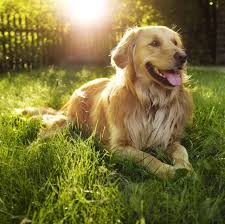
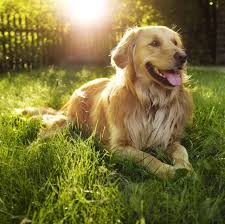
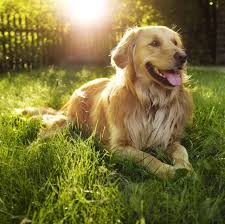

In [77]:
persist_image('/pictures', imagesList[0])

In [79]:
image_content = requests.get(imagesList[0])

InvalidSchema: No connection adapters were found for 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUWGR0aGBgXFxgaIBsdGBgYGBcYHRgYHSggGB4lHRgXIjEhJSkrLi4uGh8zODMtNygtLisBCgoKDg0OGxAQGy0lICUtLS0tLS0tLy0tLi0tLS0tLS0rLS0tLS0tLS0tLS0tLS0tLS0uLS0tLS0tLS0tLy0tLf/AABEIAOAA4QMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAEBQIDBgABB//EAEAQAAECBAQEBAQFAwIEBwEAAAECEQADITEEEkFRBSJhcROBkaEGMrHwQlLB0eEUYvEVIzOSk8IHFlNygrLSJP/EABoBAAMBAQEBAAAAAAAAAAAAAAECAwQABQb/xAAtEQACAgICAAQEBQUAAAAAAAAAAQIRAyESMRMiQVEEYXHwMoGRobEUQsHR4f/aAAwDAQACEQMRAD8A2nFsapBcBki1bmF0jipJynMVK/DTSFeJxCp6FFLJSlXNzaC5aCOG4ZKpRWFPmLIa72DEx8THGow830NqNFhEpUG/EdHiUvDlIUWY2hbwzDTUgyyQlbvu47wVicSpCHJCqs71faJJVKkwjbArLfMDF+FBy1I6GEqZsvI5JB73icvHGiUgNYExswzfoc1ZosOs0c06QWiZGf8AEUlgSKwykzrVj2fh8lolKI2SqJwLKXBIMenB6ISVHsdHR0OKeGAcSYMWqAcRMiWR6KQQDPrSF2KQkJJeo03gqesk94V4yYX3GkeXmkno0xQoxc3msNoH4zIzICUS/kHMR+8WT1lymjn2hQvEzE5gD81CN4yyjbtehQAm8NW7BiWehdoz2JBeNdNwpTzqcE0yjXpSEOIleIpTIygeTRbDl3sSQjmKgaeYKnoYmBJp2Fd43xIsFUIgERNUVuYqIyqaKQM9GgtcCzoeIBtisXIOHkoRLWJwJ8RalOlQNgE6e1tXiGLRlUwY0FrWhWpVBBcutzC8KOR6xjol5x0EJ9dweGR4eLIUACSQSQaEOBS0C/6mv+lkJlp8NOdDHdiKxkZePUVLShKgDcVpu4g/DYlSpGRQIQkuFh2BuRsTHhy+FrcvdP8Aai3I3Egzv9QCCtwZTm32KwvVxFSJs1BOYeIad9oSYT4kZctSgSU0JIqoaR4eMIUuasggqLgBMRj8JJPcfRL9xkzSYnFELSQcybNtSL5WJKSHodBekZ6fxeWrwiA2X5kgM+xJ1MFcO46QSCH/AEEN4M1HodGylYl770i6Ti36VjN4biSMx5jlZ3ZyIJwmMcA5rqrFcLlAPGzaYWcaHSGKJ0ZxeMygJzaesEScZ1j08OW0Rljs0ImRFc6FacVFc3FxoeQmsQdPnwqxWJEU4jG0hNjcZGfJkLwxhc/GjSpennCbFYxSVkPYxKfj0CpSVe0B8Nw5nzwAHL2J/YRg48m9FKSLE8SSXcc2lNekL8BLzTQpdgohbXDWoOsbDC/B6XckgKcMqh3oxdvQhokvh+Ew88nOsqVdAYpT0Ban8wsvh5KL4+pPmn0ZP4g4ioK8GWHQagi+bWsZjF4OcCStJFan3j61Ol4NSgTJzEWJO8dOw2GWkpVISoO7ZlfvBwYJwSSr59/6Ecj4ljZJFSp3EK1o284+04z4ZwM50mSqUrRSFqLdcpLGMpxb4QmYRC5jeNL0KNNXWGdNhazXjbBtLYrPnE1MVOGg/GSW+Zgo1ygWBrUfh6J22o66cGjStk2VrtFE0BusWTFBhFSrQ6QDwgZerxegikDZqNBaAQBDHEvFTsY6ObtHQKOPovDviSXKxU2bLQAJyWOarEPUesS4ZxRZwc6V4YKHUSsaAkkhoznD+FZ8SJSpiUApzA3HbvBOFxOWVOlCYEhzaxbTzjxJ4Mf9m35f0XRRNmhkqQheGmvLU4NGYWuYZYTAomzMYXTmKQxCaM2jxkpPETOEqWsJSEjlypqojSCMJxQjxCVkKYhttG6wmTFNp1+L/FjJjHETZQwchTJ8QL+XUhjU+0BS0LUJikJZKQ6ujwHKmJySx8ygqo6QTieJgFYRRKiDbbpFYwlG0vd9/UZMKw+JLBNn1MHImUzCwMIlcRKgnNVi8XysVRQ3LxVQfZRM1UnGkkOaQ4wuIjG4KfaHOFxUOvKU7NTKxMVT8RSFMvFGkQn4qjPrDOTF4hM/E0heuaC77QOufaBfFenSJSYWxpgpZWlYe2U0atY1XAsAJAmT5lA/L2YC25L06CMn8HYBU6Yc2YSkh1qdhQuA+8aP4i42kJypYp02G3c9TTvBhDg+b/IjJ8nxQr45x1apgL5QDQA+nnrAeGUVkrNzvCucoqUmjlRbtqonsLwywMwAOY50lyfbKfJBRmKGkByPiBpmVVu0VcWxkwgiSkO34i3oNYw0yTP8QHKoHU1qXvUt6bQ+OHLdi/U+uycSFDMIhN4slBAzMXGu8IeAYkhHNcxX8RcOM+WchyzAOU2fYE6HrDcrVCcUnsRf+I3DUg+KlgF1OWjnVxr5ee8fOp6BpH07jSlKwYlzQ8wAV/uAY+oP0j5liFV2ivw7dU/QTIqBVisezAGiZDxBmpGgkUKeDQgMK6QCpUGhVLQwCPh9Y6PPE/tjo4JoMckonpc5gkfh2iuXiSc6EjlUXY3HnHuC4qpE1M0JSoh6KDpNCKiBJU8KmKJypLFtA52AtGRQfsNYZLnhktRQ2i2VVRqxO8L5M5HhqJ+dwzWbV49M0uxBcinWDwOsZYKcpIKg9KOOsdMnBzWhEBJxByAVvaOWrn8oHDdjJhkuZaCZc2E8tZeGOGrDOJRSHWFnWhhh58JJM/LFn9ZC8CimaNOJ6x4vEVhHLx8SmY6FcA8w+didInwiUZs4JY5fxkPQGjki3m0I52Mg74aObF4cM4M1DjoFB/SFUBZSPqHGpkrCSfCQwUoB3L9vJ9IwnEMRnygVrUwV8fSZiMSrMrMlXMk9LN5EN5QmwqCeg60gN8nY0IpRQxwk1yvcJU3/AMiB+sNcCgawhRiAmceoP1BH6+kMMFiuZt4jk9AtdhmLlapd+kDKSyeZn9Y7G/EshC/CurX+dI6ZMSsOEt2jn5RVsXS5i0lg4HSO4hxAJQVKWQw0NX0HeCJsphSEPGJYUggmnZmI1imNWwSegvCceROlmXNDbPlLf8wb2jC8Yl5ZygWIehDVGlopxSSFAhybBvusEcQ4eqWEZgXUnMXuCSWB8m9Y3KMY9GeTFz1tHk5Qegi9Uu9XgUHpDImUzRWzQanNpA81i28FLmgQ1nHvgr6R0ef1EdHBOkrLAPYwVhkspSlAVSQB1MNcHwZVwmxg2dgvEmEpapD92rGOXxMbo6zNpDoKW1ofu8N5+K8WbLWpIzBOVuwYGHyODJSnmTzGoaKp3DgGKSH2rEf6qMno5WZqVg10Bg4YFz7QyOEWaJD6vagvDC4QilKtv0eOlnfocgOdwTJKCso5mtsNX6wPh8AoglKT2g7E41ZVlAIQKMIamcqWl1JYtZm2YsYTxsiQ12ZtUggsbx54ejQVNnEqJIvWDOG4xKTVLvTyizySSujkyMjhKjLz5bmB5mHahBeNTKxSUS8tfICj1Av7wJhJJmmzkhgBU9Iyv4lq2yiMrNw2sG8KLKBSgEguCSX70IEaSV8F4pQV/skHTMQNepi/hvwRiErAmJZy7pKVM3XTzh3klXT/AEBY+4chPE5SkznC5ZBSoD5XDEdQSH9NoA/8oKkZ1TFhbfIADV6Al7do2nAuDy8ODlupnPbpbWBfimYcjijH/Bi8o8cPJ9hxzfLiuj5JjyEz0nqx86QRh5hSD1/TSFfxKT4hHX7rDTCYlK0jlL7xJRuCNcuzIfEGHyTCu+ao/V4bcM4mpMjxMxU3zJuwoH7Vg3jGAC0kGxqDsYyJVNw6iNDQg/KoG8XjWSKi+0RenfoaWd8QIZyT6frCyfxpEw5HNdWbyraK5ONkLJ5CjMoAIukUYsrQPobQ8V8MSyAoJYipi2LDRzSauxHwfhi1zgUoCkAu+YP99odcYkyzMZQLkAkmmp0OzNDbgnDfCnIYULu5etwG0F/toa/FXB8OGmqWoEpZMtIubgDMH3qaDuwMM8pKVMjkVLR89/opFbitDFa+GSTY2hhiJRNCnLqzW8tIicM9TrCrIzNyAP8AS5WpgiTwKWqL1Ye0XSZXcB6frDeM0dyKf/LaOvpHQwyj/wBUx0d47O5GnxcpKEhIACbp6tpC2XwkhJmJBfM4brcQ8Vh3Iz2sFX1i+YkoTZQYEC9xU01jwsc3EvQglyVKYA1c0+7wfg+EqN0uXsbijmL+FrCz4iaAChbVzRvWHklWVYJFdH1pah6wzk0ckK8DwoKJLcxcNbWFUzhRebyhwmhbUHTaNMiUpBchhmdne7v2j1eKUzZRlNia5u53gxm0Gj56rAKExiCKOQddWhhJSVSGUcqiSTmNwVOn0DQdiZgdbjmJbyIt5wD4iVOAlSlaMdo1RyNi1QuTJ8OZooA+o8iYZ4PhiVuRQ3HnoI5GDUEheUqqKAWr90j6R8P8JlyUgqSPEPM5blfQbNDrlllxi6+YaoScJ+FEISF4hWQNbUjV36Q0/wBaw0gZZMsdwAKbk3MC/FOFSklZUpajViQABfzH7Rl5c5y4fyNT0ppDVLE6j379v/n5GnHihJW9mjxfHZ02iTlSdv3h18O4QBPiKJUdC6m9zWEvAuFGYoGYaXI/SNPjFAAITR6MNtT5CLYYtvxJbEyyX4IlxxAFzezRkPi7iyC0sK51PTyP1IgnjfEMhABvdiKACg+9TGF4rMclViDftC5czn5PQbDiS8wqxuGE1SFfbfxBcyRkDgWpC2TiiHB0OZP6iNXMQmbKBSfmYjz/AMmGhrTKZGZjGLUsFIvCLHpUhRQRnRsf0OkaTEyCicltHcbjKCfOo9IrnJQs5aF7H3EaEqJcjHzuGFReXUbbRp+A8cmJSJU6UskUSpId+/7wFxbBGWlxS3uQHhh8NyFFKlzFGhYOfvWkUWSUdg6ehrL4gy0ABlPTMzbCxi7E8RmzArPyMOqXNggAAlRNaktCXFzD4oILNVm6+ojRo4iVoIWAohmJ284w/FOUpczpptCmTIUqUVhLA0KjV+m12ttFczAKYFrgQfP4uVgJ+VKdm3uwAg3C4dSgkBTDMQSe/wC1WjN4sl2ZGkxIrDjLb7EeIlvUCn6w54lhwMherijfWFaZYHKTZye8GE+S5MRoo8JO4j2CcnUR0NYpt5rFMugIRYs3WoEFYiSkBwq7Xtpr93hVKmKOUlJbViKbUhjhsL4oypXyGystq7do85O/qayn/SVHIpOWivw0o/uKwzXhksHRzO/V2qP4i+RwxclLqmpyjegA849wM6RMT/xXO43rX6xoWGafGqfzaOW1YEvGMCHNKczP3+nrCjFSwklRmMDoXq3Sx38ocTsNJC2C8xO7F6bwsxeFQtkBbHYnel9Ik8WW9/yOo2ZvjeLSQWapoRqwZ/aKuCsVilSGJs1d9IYcU+D5ktDylBY1SpgzjQilIE+HOBzSc8xCiB6qL+w6xV43GDXqKoNs2PB0u0w0Sl/P/G8LuN8ZUpWV+XUeftpBypxRLUpV7JYMAGsO28ZHiS3H1g4k64mvHBLZ7j+LTloEsTsyQXKTXLt8wdm2paLOBzHWB9+0Z5TqXyAlQqwBNNSG03h58Myi/Un037RtmqiO6o3MjHCWE7qPokfvAfE+JHx5ag/yLA6EsX6UDecZ/jWMIUD1YdhBnjOgqLPYed/OM/KVfInwS2KeIzHN6/ZMJsdMJcdYNxijmPcfzAk1I9ItjjRRsUzg5hnw3HqSkoP4S47Zg/1gdWHdTRDEI+VQsX9CBGhxsk2e8S4q6SrVJcdgOYeaXgkSEJlIW4dXMnsp8na494QzZbIWTVwUt1JIr1yvA+C8acsBySlWboAGA7AUAEXjHRFmxxspKqq+UOfencUJ9IS4jHUEtFKufPT3eL8bJmZSSWow6Uf1dgfOLOH4Hk8RVz/2uH9YDRyKpymWM2rEed/cGD8LMCSzuNDFeJk5k9RmA8lOIAlzCD5/URKcdBLZiyFkaOf3EH4LHkD6HbeF+IcrTSllE/TrWB0Thmb8JPnuS3Yj1EYXT0YpabH/APXErKlKJJNydWEUYpYKSpqGgPUAE/5gCQnlmrILBkpNbm6iz0AB9RA6Z2UVd2du9R99YVRBYZ/U9o6KmX+Qx7B4gNseJJSQjKAUJYmnMl7vqbDvB0njMuUhw+UglVEgBm1Pm/8A7Yys8KExZBqSnLSgH43Ll+x2LRDjPjLSZYDhSVlIAsE5CEtYuXetX7x5/G2tmjkas8QONC5QmIyPlYnKdFAgmh5SC3WBUcGXKzS0HKxzKWo09un1hDhsVnSFlAQoZ2Fjm8IJfl+Y8o7BonjeMrEvKpQJLH5iTQBsw0qk+QgLm/Kr13v20N4lGlwmHkgpImqUoMbNs1+unWHGB4ZIXmnFyQbP8rAUaPmeHxZLqDXDKU7fKSzvWx1rGzwXxT4a0SshKVh0rd0qBDuNrjzeN2HLxn51qgqTl0aNPAk0yLmgXqQQfWCOIIlpRkVNMtwwIIB9WhFxz4myICUfMrq1N4xXEJ09ZylalC+atvP6Rs8WD1Bd/oUjBvcmafj6CmXlEwKSxII1e3SzWjHiafDWFM9FeQOT/vHpBWKnCVhw5sSAzUdnJoXZlBtSRWEWMxrzZzfI0xI7yihbNpp7wkYJ9fdDLLWiqb8x6CnqQ3v7xpvh2eyAkXapP7RmCvn8MqYcrndxmAPQPDPhE1VgC5p50p7xTIriU5phfF5pKm7tDPhM95TbD3rCTiU4eIoPQcoPRPKD5s8MeAApWqUoMXLvo0QcfIgt6BsSli/n+n7wIhBUoq0SIb8RwZSp9CKffnCvBzsqlJ3APoa/rFYLoDlo9kSTlUo/MUn3iEmR8qfL9vvrDmXL9iR7loFxiMgzj8JBbo9R3EakiLkIzgznWFBkISVH/wBxKQPO8HfCGCypWojmVMy98oDfVUFcUSF50poDlJ61cfrDPBy0gAigZ+wLqUfqIpFk2xR8ULqhCbk17W+pi2YAiWiXqAB3LZiPYnyiaJGafnVc/KNgP0Ar3MBcVn5VzZtSJScoG61sSe7ZfWDI6ILOxGRBQDVIDnqYpQASKs/7UgRbqSlX5gFH0iEnHgFqHaM+T8OguXEs4gUqWctqjZiLluoF+kRnYgTCkq/ESa3oHJPewgWWQUrUkhyf/s5cHpQedNTFLVUoirABhp1Nxb2MZeJll2PpmIOVMtLZWUVsbKUx9qeYgLEDMVAJU983W+vp5QLhUqQVrvUNW71t1qPKCzMGV2IchwatQsPvpCqPFihuRH55np/MdBPhDdf/AFFfvHQeRwTjJ5FLh2cV/FUv0JbpBuE4uEKoH/CXAU2a4AcVDAu494UY5ABKM4UEVcE1Fn5h/b9TFCSrPmSpkpIFxWofl7uOxEYJYk+/QrYzxeIljMgDIlJYFJFyASkuT+Y0B16RmuJcSYsLKSc1ncO1RawaPMfMKkrURWWSRV+Uh3Z3JD/Nr5QDKwJmheVysBKsu6VgEMKVBLMNFRs+HwRjtsW7GPw+jxJiEheRucueVnSA9KX+3EbrEc6mQ4BqQLMwq3U7b9IR8A4F/TpM6YASEkAZmckpZJDOCka2oYrxU+cQfDSoISeYsaAhwX709IMnGUysJcUPlSEH517klzYXsNhFWJVmShSWVzA0pQKCVdgm56OdIVylKyhKyHVyh9QS6hQM5Y9xrBCXloD2UQGBJYgBKg35crDy6mM8snsFzsS8enpVnlhSSUGgS7FgcyXAI1Ub3cQh8BWTMjMtKiSutQVZwS2xBAfrpGsxGA8JQUB4kqWk/KA5mlT0G/ysqrAC9QasFhUcs+S6kFC1ZDUpOqSBoKtf5eoI24skYQpE2ZzGK8OatAOYIJSCWq1CfXN6RqPhEf8AEnrPJLqCXqoDO9NP3EU434SPi1fKs0DspRUpyHNgkAEu5Z2Bizj8xJko8IpShCS0sH8MwoYl7kip6vU3hsmWM0ox9R4zaB8Gy15rpBGZ9mKlW6JNIP4ViD4zmpWa9zUmM9JxxTLcGiizC4ASpKn6HO3kYZ/D2LJmgMB1Ne7de7wZR7ZeMrRueKNlrUxicWtldy0aDj+OIDJ7UjFY7GkFyliDvAirGh0avh2JdnNflP0B9QfWB8bi+fJoQ/0f9IWcKxLlQsDUdzfyJAI6g7iLJ8z/AHATavuCR7gRoEeiz+pCUqNyQAO7sB99Ya4JGUJQS6lVUW/ClqAaAlqd+sZuTzTQDZGn9zu/3vDOVxABRI+Yt5AOw9yfMw8XQj2OyRnLCrM/Q6ewPWkIeN4tI/29VKzNvoBBOCxoIIBqzk+30EZrHLVNWTQqz8oDUSkAVPmCYLOiXrmBiAQdAIz0+SoLcVc7er9IK4oZkkBzU9jAODmlakhwlRsTVzoCNjbzeF4urJ5HsMly1OHUydcpFG+lvSOmTEglQJY2csff79YhIxakO6b0qK60Asn000i7B4UKU5Zz1d7Euf23vEXHtskwjDYpQqQ/pV9doNkTUqzHpbY2BctR/MQMuvKP8tUhtO/WKMOAlJILMQ/WuvlCPGmhUHf1C91R0T/1FGyf+T+Y6J+Gw0aJMhJGQvbRi4ByEKSezPsYW4YJygiYlQDljo7VIFS5b0ETVxFgpQJIIo9wWI+qi/YwCqQBKJBJCsqbEcqASwe7lj5RggnvkOz2TLCqlKQVapV+a9FFzQ2H6wz4JhJSDnYZ00cFgH+VKWq9PQQrwC+VRUag2szMavf+Ilh8WCM1vDetuY8rlqPpZrxeXLZyZojjAlKlpU6i+VRahNTymgoR6xk8XxZSic/zEjmc/wBtRS1HpuekWqxmVlFmBa9TmSrS5qB7Qu8V1EPmKak6gn593FoOHCo9nNjqRiFhJSF81NwDXKHHYDeGqZ61VJrY0cAsCanoQ9nKDaMzh8Q8yov1I/C7U037w8nrCUy5iVFjRQZznQQKtTmzJL9XhZw3RyGPDRRSRmoVFT5iQ4yk1Z2ZgRo+0XScOAEpBAzOJiAo0JCS4Aqk5g9Q9VbxVgwUZCku6nI+UrWkhOQkku70AoGN3gLh2ImCUnMt5is6jmqxlu4T0CQT6XaJradDDZGImLTkKaHKau6c1EkEcwY5gfN4zfxFw+sz8nhKUlFXeXnZ9QOdBA/t9dJhJqkjxCMpMpKyN/8AbUSAWoxJfq0ZxPEFrWJayylSTyqflUcwCzqkkNawMHDKSk69AMyuBExkZktnLJCg2Z8po9xzCtq9I0vDUBCkGgQqqVodlAM4GxDsQWI1aAviHMqYjMjKiUgBS1MpRT+IBJuSvOkEBqjR2jI42hawlUvKlBJSmWtWUJQCpIKVuCo/mDEkl49GUnOPJIMZUaniGJzHKqg/KmpA3JGv83hKeFSlmj5X13sPrC/CYw3PMSX5ia7dLNBieJsACQHNj1oS/eDFDLKMDwjwz/t3o4uKWHSF3F1rQCoJJFKgEgXd2tQ6wV/q7dyf0A/mJLxgKVczUN6fh9oaLoblaMqnjSgCAKE31PbYU94tw+JExJZVmdqPWvZ/eHuK4WiZXLkJspmV0LfvXoIQzcCqQfEUQpDUWkM7/mH660rFlKLWuyclKrDJWKEtKkpJzFOQb6VinBSwkgAV01q8L5+JSpjYs4I1386W79Wd/D00Cac1aOCz03/jvAk3Q0JWaOTwyXPQETk5u9wehuIxHF+DHCYky1HMkEFJOqTUUFzoe21vocqYj8JDtT0f1hN/4iIA/p1KvzJJ6BiH6Bz6wmOXoDL7mKxIutTlyVBI6kkknQP69IJw81eRzR/KmjBmaKsPOqp81PkAZ1KNGL2FbirAx4vM3Ut0YEF3Pp6RRr3IE58xmavfbudIuRNBBIZ3au4NRW/eAEYYqLZyWuBru3t9YcycOQ6koAKQWzKTy5WoMxAJNDS76myTqtBPc03c+8eRP/8Ar/Mj/qyv/wBR0Tp+6OoY/wBahSQDqSxRS51CjavSJYqbyhlBqABzrVVDq8J5C3CWOYhgb02920i6ZjsimpVrDagrpTzjGsW9DWFSsUCFEpCnIr02L3pAmJJAG5exBqb1cvQew1gefNOYMS120LkMAPM+8C41VdapCm6sHppWKwxWzgwhJGrk99r+m0DeKMxWC24+9KgecVycRzhxRk7bp+/OKEJIooXJH2dd/KLqG2Aa8NlqVMcAHldjblbyeGSCSQgq5VEqBa6UlSTXRx90hMUMErUpgQ9KMxZXmotBmCxxWrOo0QtJUAGBTUBKaU+Zg+l4z5It7QTScSnrQrCpBAIqVJcsogZg5oeXTvDTJmnlBfw1JCVKNFBU45lFJYEcrJuPmEA8KkhZUlRMwI63qDLLvtm/5tYfTkMofKCCCog6B0AnZwD9Y86c+K+ZRC/+qUcQCM2Tw1ZAHKQStaATuOZ2c2BhNNyoVNWoJMyXKdCiA6UAJCDMZyXYrAu1xUQy4vjEIlKCVElOYpZPykEAOWYtSFaVoyLKyyprOUlRV4eYoCiDUFXMWG4Ah8StX9F+4GAYLC4ifiU4gSiyRmUQpPzBJGYA1zEctjUwiVhUibMBIllJIqXFTRlbCsarA8REpOQUSZp8NSVJBynQ0qHAHR9GgTHTkYwiapKZacpCVFgxClBj+bdu+jt6GObT610K0qMpjcQlKglBKvzFQA9CCXpFkrEOAq9SAFMbMS2/8wdxrASk8kpaSSeZTGtGYEpodaFi8KJgVLOUhmf9nrG2KTiK0EzcSUhJGl/vuPeC8LikliSSz1OlNhaFHiPXbfuzd4tw+IdWUgbil29DrHOGgJtGy/rhNsabb6em/kN4NkkVJsdP0brGPk4sSyMhdOgdyLuOtxXpaHWG4qlRzaj5RW+qj10H20Zr2LQmG4j4RlLzBCvCKuZjUA1sKFNnu3SkCcK4HiJCyGStJzJ8RJLByAaEPUZrbwVM4wcpLVBv2L/feIf6ofCLrIYPY30+zHRm+mc0uxz/AEBCaVOx++0D/EcoTZSUkFqFKtUkiqTuGp/iMNisdMJJVMUTq6jWtv4hpwjFzRKUc5KNjXbMegYwrTXQvO+xfg1JCuZ9uxb+Gi/DTArMnQ+v3aL8VKcGb+bSlD21p7vCNZUClnBZ36nT0aKJciVBExOQ5QOxjpcwl9iz0seu/vAkzEqJepqwgvCGqnKklr1vv67QWqWwkv6pX5B7x0E+Irc+n8x0SuPscUpXlBDAObHSpo8TM9OQUdyXJNRFWclIJrTmFC9KMfu0QUQpIFmemrgi3pAr3CHJl0KQbVHv+oPrECgXLFSUi5YAOHffWApEwZSApwQW3G4I094uTOelAbF9SzQHFpnFGJTldvzU12a3aDpEhUxYCQHCnzM4ZnIP/wAX+2iC5BZLIHMQCHatiX03eCZgCQlCFklRGc0bK7qYi+j9oZzta7OJ8UloTylKg6XTf5VDkcEXzO+rw4wUhCpakqSSZkqWpks48N0Z9mDJMLuH4lU/xZSlqStwqUpKiKEsUuN2T5k7wXweeWMucF5kKVKSpN8nKo1O1Yx5LUa9UMh7hZ4lAkMZ2QJIyuk5UqKVpY8wYnXSLuIywMNLGYBSmBBJDgEm5/tAjpeFBSqWJmVQASVAfK4BUElhU192iU/CyxLRMCwtKXSpND5vdNmjI6fY9GY4+/iEOys6qbOlBfZqP3eLMctR8OreMqWClqpypFT5r9usMsd8PLWVCQnxSqWkS2PyiYMzkE0skU3MQ8OdJWmatC0JTJykLCVc6QlKg93epYaM8aUmop119/yLQpODErLlDpIoWD/7ilA1NiLvuDAslSlSVKShKkpKigNdIbQVdyXjUYVJmyssxCfESCqqAkqQoPZNArmZhRz3gWZgcuWYmYuiag5aZj8uUM1qPFPHSu+zmjLLlKAStaSVK+SUXAfVRGnbWORKCyxJSDY3Y7EOXTtRwIb8TwwCJigrOsgFJcOEFRp12LbQkwYLqJFCKAvqHtb/ADG3DkU05IRguMwK3cDRi1WIiP8ATKJLJNAR3oXjQSMQFU1cU7kiLJgBK1JanKOjUf2MM8tOhTNycAx5iX/XWCDhlJCSFcwcMadR99oJWQk0e/r2/eKglwomwH0uPNoWU29nbLMPiVMc24B8zQ+sDTVzPkSHO1PrtHKTmJoQkhKi39rtoaWiZngmhIaz6jagpHJeoW2QwyUMVK5gBW/UFuzP1eJrxCnajNUCmpFu8UzZGcAJNSWYdw1DeLsWAldbMEsN6kmGfYobMxnKlBFw9NH/AMQmx1z3guakJANhlbtreBZyaVYMaauLeUdj7sKBkS/Ovv8AYEGoVmcjpalXqYqmpQlLD5i+vqX+9Ygj5AgXUq/RgPrFuwlvi9T6J/eOgfwDsfWOhaXuDQwm5pSVBYLg5SA2hrcE+hGkQk5DVRTmHykvU02gjH4gzEhSrpLE7hgA+50eAjhApDsUpSoDNdnBpTdozra2MRWGKiSASdr+Y1rFancEFyWNPKKcSDZ7fTrFmCDl/wAiXJ+kUqlZwxM0iUA5pfqKjyYiPOEozTMgKWIq5ZqbjpF4xMpaGKQkGwDnlpWrqFfrHnD5KUZiUFRU4FGLuGT0etdog3UWq2cOEkSpUzw2ObkTmuAx5mu5cqbtBvwlis0tKppUZuhNHIdIfqEgd3hTi8FnKUAqqp1MBfKBd+/tDMYtMtMuWkZubKgnySz9C8YciUoUu3sZMeTMetKDMCgzCm4q/etfKFvw4skTFKQopLAu4BQXIIDMTXvEuESsyiJgUkZXqlwWNWJFnesK8UnNMOJUphLLITo9k9QWakTjDyuD/X+EM2M/jDDLTJzpbLyh01MtAppUEkFu8IuD8TZNVK8MKYuVM6gQ+V2qakw64fx6eQAchXchQ+ZLFnHvEZ/EJsz5AEA5StGQADYA5a3OukUxuoOEl+YOw6Xxhapyc/OEoYEXslLZvUB+u0B8SwqpIJGXMqhqPlzEilw717QIviMxCSJYzZhlCzUPXUWgUT1qlh0gZvlUS5Liz6VcekN4aVM5tUWz0JSWlupN6/g/Ml+t4WYguSehZti1faCZZUVFiWYFtioVzB+l4CmEKHK4FQQXcfxGrClF9/UR7C8FLcBbAE29XHuIomEy0EDXT6/rE8DOZABL6fy/pBMhZeYaEiWWeHlKm2AW5ySfrFC5zkubWvpRqd4sKtX79/sRRLWQcxFDbz/aKJas4YYPEpUQlTVbTbrvA/gBSwxbL169bx2FnJdkgM9yaxMLbmYUgbi3QDsMyZqmFkuYqmTAyXBJJc9DX3ghM4MpRuQxcVbaAlTgp0vRLfV4KTZxIrASmpa8UpBmKyi5dm16dBHT2KUgCn8wVgiE1bzMGKpHAU/CrCgCKgVr62i8SsgCiKs7dTYDyi0krWX+QXA16QPj5yioph9vRxX4U3/046KPAV+b3/iOh6j8gjFeLehTlcNTmFtjVMBTZZQmlQTUio/honnoRqfLSIjHTEDKlg96A2reIxVsIKtJJsW7QwkymQpgRnZI3YBz7wTwGWvELZSmSKqXsPOGHGcNhFHKmfkUksAxLny3gTlviMourFcvh4CZRdlrcN/baNFxCWEkAsJaACaQBiZJExABBbKkB7J/Ee8T4opXiBCQ+qlKsSBatIwyk5yW/cB7xDFpVKyy0kVBDkc2UMLb7QvmziEIUQ2VVGNAxfyiOCJmTAkXQDoS9a9hW5hjh+DoyzJkwkS0hSspfm/tYWqPeH8uPTO7G/iTK58Qc1GSpROVLuhCXom7tAHGwRLyywpSpZ5hoPxFR7WEKsTj/EWlakZQEZkoFEhtevnBPGMQp3SWK6LazsPYiEjjkpq/v7R1hEuSFIlzk0XLKMzKcMCxr5mkFYbiCUgLJyhZKkhyS5ckNbLy0feAeBhKVzUFJCSkEJVYkUd7Xg7jWGk5ES5f/ESDmLGosw0eFaTk4v7Qy6sq4djgA5S9nBDO5eh8y0ecSniWsNXNzMzihYXt27xThspl7DM4AuMgoFDb94niV5lof5yygRlapDOa7GkBRXOwAwUfFzEkIYukOzl7bbeQgHFzlJZKi40AsAdSbvDHhUhC1zBOWqWnORnYkPUi3b3jPYkrB8NRBSKpL6dDtGvCrkKFYjEeGXSxIPrBCcaSlRAukuO8LJiwTu1h7NGs+HODJ8VUqYpzkzEbZtDFMkoQh5uzkrM0tboDX2feLA+UOl/p0gfF8k1cvZZAfpb9I4YnLyvUa9WizWlX1OOkIylLlmPr5ROQSAQwKS7tXtA8uaHD1O8Sw69XPZoaS9QBOJmEhIFreYjzDJTUMaEPb3eKP6g5k0oT6CK53K9aEv3gRi6OC5sv5qMBW+/+Y9lK5htFTqKCNm9No8RMYQOkAYzZhCX3Lwpxk2gI8zEp2LcHMbNbrpEMwKdbOIeMa2zgdz19I6IufzR0UoJ//9k='